# Final Project- Timo Zaeck
# Course Micro Master "Python for Data Science", UCSD

Dataset

https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Import libraries

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

Load data

In [269]:
df = pd.read_csv("ecd.csv")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


Describe data

In [270]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Check for null values

In [272]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [273]:
len(df)

5630

Remove null values

In [274]:
df = df.dropna()

In [275]:
len(df)

3774

Checking for duplicates

In [276]:
df.duplicated().sum()

0

In [277]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134


Cheking for outliers

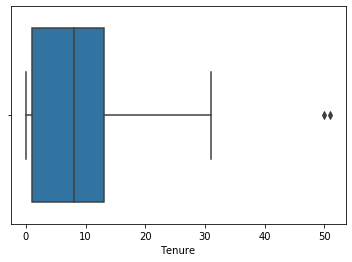

In [278]:
#Tenure
sns.boxplot(df["Tenure"])

In [279]:
Q1_tenure = df["Tenure"].quantile(0.25)
Q3_tenure = df["Tenure"].quantile(0.75)
IQR_tenure = Q3_tenure - Q1_tenure
print(IQR_tenure)

12.0


In [280]:
upper_limit_tenure = Q3_tenure + 1.5 * IQR_tenure
lower_limit_tenure = Q1_tenure - 1.5 * IQR_tenure
upper_limit_tenure, lower_limit_tenure

(31.0, -17.0)

In [281]:
df_out = df[(df["Tenure"]>lower_limit_tenure)&(df["Tenure"]<upper_limit_tenure)]

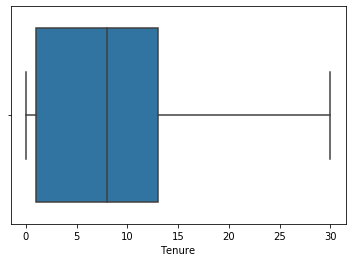

In [282]:
sns.boxplot(df_out["Tenure"])

In [283]:
#df len after remove outliers from "Tenure"
len(df_out)

3749

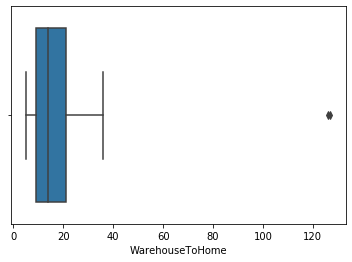

In [284]:
#Remove outliers from WarehouseToHome
sns.boxplot(df_out["WarehouseToHome"])

In [285]:
Q1_warehouse = df_out["WarehouseToHome"].quantile(0.25)
Q3_warehouse = df_out["WarehouseToHome"].quantile(0.75)
IQR_warehouse = Q3_warehouse - Q1_warehouse
print(IQR_warehouse)

12.0


In [286]:
upper_limit_warehouse = Q3_warehouse + 1.5 * IQR_warehouse
lower_limit_warehouse = Q1_warehouse - 1.5 * IQR_warehouse
upper_limit_warehouse, lower_limit_warehouse

(39.0, -9.0)

In [287]:
df_out = df_out[(df_out["WarehouseToHome"]>lower_limit_warehouse)&(df_out["WarehouseToHome"]<upper_limit_warehouse)]

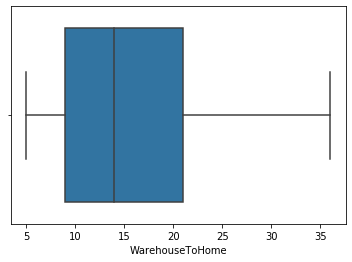

In [288]:
sns.boxplot(df_out["WarehouseToHome"])

In [289]:
#df len after remove outliers from "WarehouseToHome"
len(df_out)

3747

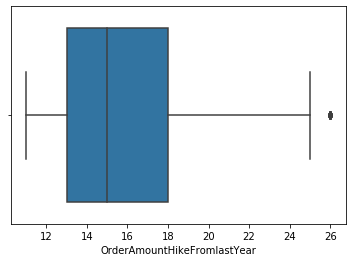

In [290]:
#Remove outliers from Order Amount Hike from last year
sns.boxplot(df_out["OrderAmountHikeFromlastYear"])

In [291]:
Q1_orderhike = df_out["OrderAmountHikeFromlastYear"].quantile(0.25)
Q3_orderhike = df_out["OrderAmountHikeFromlastYear"].quantile(0.75)
IQR_orderhike = Q3_orderhike - Q1_orderhike
print(IQR_orderhike)

5.0


In [292]:
upper_limit_orderhike = Q3_orderhike + 1.5 * IQR_orderhike
lower_limit_orderhike = Q1_orderhike - 1.5 * IQR_orderhike
upper_limit_orderhike, lower_limit_orderhike

(25.5, 5.5)

In [293]:
df_out = df_out[(df_out["OrderAmountHikeFromlastYear"]>lower_limit_orderhike)&(df_out["OrderAmountHikeFromlastYear"]<upper_limit_orderhike)]

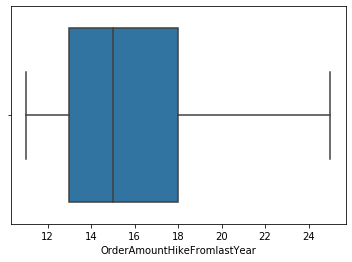

In [294]:
sns.boxplot(df_out["OrderAmountHikeFromlastYear"])

In [295]:
#df len after remove outliers from "OrderAmountHikeFromlastYear"
len(df_out)

3724

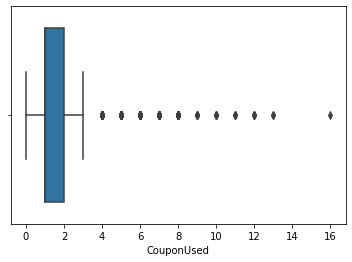

In [296]:
#Remove outliers from "Coupon Used"
sns.boxplot(df_out["CouponUsed"])

In [297]:
Q1_coupon = df_out["CouponUsed"].quantile(0.25)
Q3_coupon = df_out["CouponUsed"].quantile(0.75)
IQR_coupon = Q3_coupon - Q1_coupon
print(IQR_coupon)

1.0


In [298]:
upper_limit_coupon = Q3_coupon + 1.5 * IQR_coupon
lower_limit_coupon = Q1_coupon - 1.5 * IQR_coupon
upper_limit_coupon, lower_limit_coupon

(3.5, -0.5)

In [299]:
df_out = df_out[(df_out["CouponUsed"]>lower_limit_coupon)&(df_out["CouponUsed"]<upper_limit_coupon)]

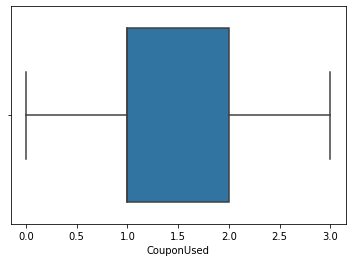

In [300]:
sns.boxplot(df_out["CouponUsed"])

In [301]:
#df len after remove outliers from "CouponUsed"
len(df_out)

3334

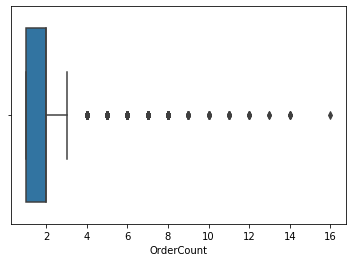

In [302]:
#Remove outliers from "OrderCount"
sns.boxplot(df_out["OrderCount"])

In [303]:
Q1_ordercount = df_out["OrderCount"].quantile(0.25)
Q3_ordercount = df_out["OrderCount"].quantile(0.75)
IQR_ordercount = Q3_ordercount - Q1_ordercount
print(IQR_ordercount)

1.0


In [304]:
upper_limit_ordercount = Q3_ordercount + 1.5 * IQR_ordercount
lower_limit_ordercount = Q1_ordercount - 1.5 * IQR_ordercount
upper_limit_ordercount, lower_limit_ordercount

(3.5, -0.5)

In [305]:
df_out = df_out[(df_out["OrderCount"]>lower_limit_ordercount)&(df_out["OrderCount"]<upper_limit_ordercount)]

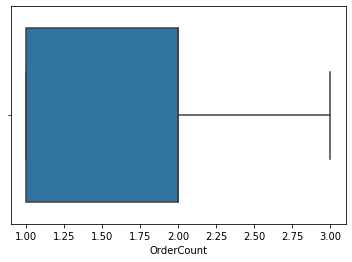

In [306]:
sns.boxplot(df_out["OrderCount"])

In [307]:
#df len after remove outliers from "CouponUsed"
len(df_out)

2954

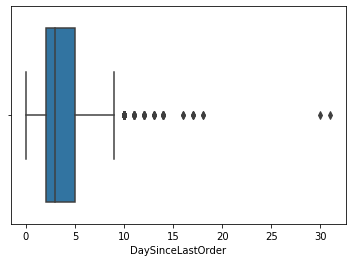

In [308]:
#Remove outliers from "DaySinceLastOrder"
sns.boxplot(df_out["DaySinceLastOrder"])

In [309]:
Q1_DaySinceLastOrder = df_out["DaySinceLastOrder"].quantile(0.25)
Q3_DaySinceLastOrder = df_out["DaySinceLastOrder"].quantile(0.75)
IQR_DaySinceLastOrder = Q3_DaySinceLastOrder - Q1_DaySinceLastOrder
print(IQR_ordercount)

1.0


In [310]:
upper_limit_DaySinceLastOrder = Q3_DaySinceLastOrder + 1.5 * IQR_DaySinceLastOrder
lower_limit_DaySinceLastOrder = Q1_DaySinceLastOrder - 1.5 * IQR_DaySinceLastOrder
upper_limit_DaySinceLastOrder, lower_limit_DaySinceLastOrder

(9.5, -2.5)

In [311]:
df_out = df_out[(df_out["DaySinceLastOrder"]>lower_limit_DaySinceLastOrder)&(df_out["DaySinceLastOrder"]<upper_limit_DaySinceLastOrder)]

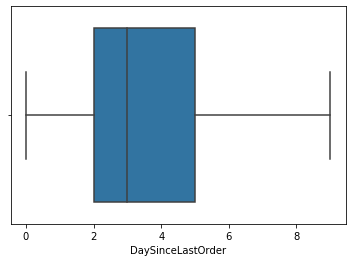

In [312]:
sns.boxplot(df_out["DaySinceLastOrder"])

In [313]:
#df len after remove outliers from "CouponUsed"
len(df_out)

2870

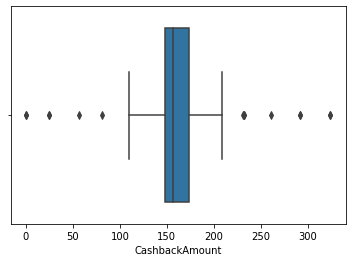

In [314]:
#Remove outliers from "CashbackAmount"
sns.boxplot(df_out["CashbackAmount"])

In [315]:
Q1_CashbackAmount = df_out["CashbackAmount"].quantile(0.25)
Q3_CashbackAmount = df_out["CashbackAmount"].quantile(0.75)
IQR_CashbackAmount = Q3_CashbackAmount - Q1_CashbackAmount
print(IQR_ordercount)

1.0


In [316]:
upper_limit_CashbackAmount = Q3_CashbackAmount + 1.5 * IQR_CashbackAmount
lower_limit_CashbackAmount = Q1_CashbackAmount - 1.5 * IQR_CashbackAmount
upper_limit_CashbackAmount, lower_limit_CashbackAmount

(213.0, 109.0)

In [317]:
df_out = df_out[(df_out["CashbackAmount"]>lower_limit_CashbackAmount)&(df_out["CashbackAmount"]<upper_limit_CashbackAmount)]

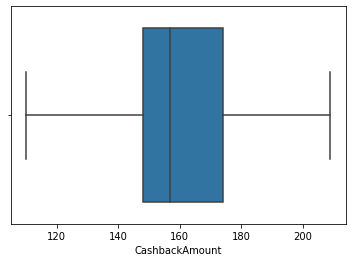

In [318]:
sns.boxplot(df_out["CashbackAmount"])

In [319]:
#df len after remove outliers from "CouponUsed"
len(df_out)

2856

In [320]:
df_out.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134


Explorative data analysis categorical features

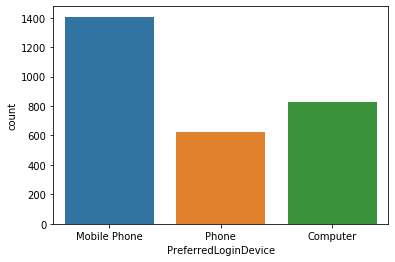

In [321]:
sns.countplot(df_out["PreferredLoginDevice"])

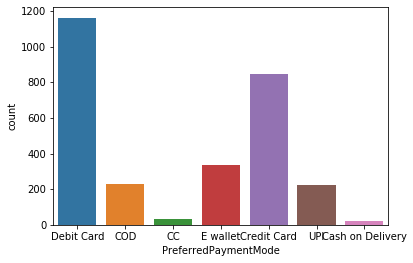

In [322]:
sns.countplot(df_out["PreferredPaymentMode"])

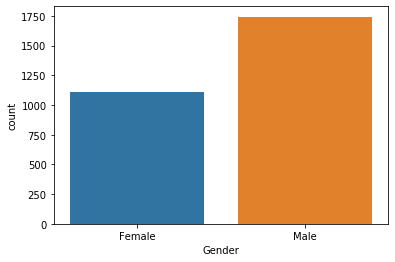

In [323]:
sns.countplot(df_out["Gender"])

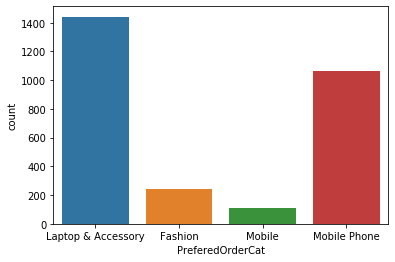

In [324]:
sns.countplot(df_out["PreferedOrderCat"])

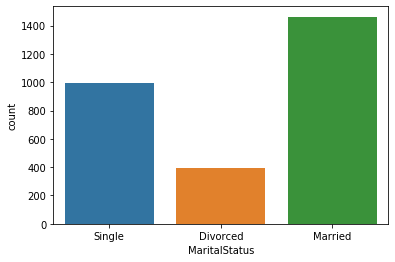

In [325]:
sns.countplot(df_out["MaritalStatus"])

Convert categorial variables to numerical

In [326]:
fav_device_dummy = pd.get_dummies(df_out["PreferredLoginDevice"],prefix = "Device", prefix_sep = ":", drop_first=True)

df_out = pd.concat([df_out, fav_device_dummy], axis=1)
df_out.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,0,1
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,1,0
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,0,1
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134,0,1


In [327]:
fav_paymentMode_dummy = pd.get_dummies(df_out["PreferredPaymentMode"],prefix = "Payment", prefix_sep = ":", drop_first=True)

df_out = pd.concat([df_out, fav_paymentMode_dummy], axis=1)
df_out.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone,Payment:COD,Payment:Cash on Delivery,Payment:Credit Card,Payment:Debit Card,Payment:E wallet,Payment:UPI
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,0,0,0,0,1,0,0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,0,1,0,0,0,1,0,0
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,1,0,0,0,0,1,0,0
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,0,1,1,0,0,0,0,0
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134,0,1,0,0,0,0,0,0


In [328]:
fav_ordercat_dummy = pd.get_dummies(df_out["PreferedOrderCat"],prefix = "orderCat", prefix_sep = ":", drop_first=True)

df_out = pd.concat([df_out, fav_ordercat_dummy], axis=1)
df_out.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone,Payment:COD,Payment:Cash on Delivery,Payment:Credit Card,Payment:Debit Card,Payment:E wallet,Payment:UPI,orderCat:Laptop & Accessory,orderCat:Mobile,orderCat:Mobile Phone
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,0,0,0,0,1,0,0,1,0,0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,0,1,0,0,0,1,0,0,1,0,0
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,1,0,0,0,0,1,0,0,0,0,0
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,0,1,1,0,0,0,0,0,0,1,0
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134,0,1,0,0,0,0,0,0,0,1,0


In [329]:
maritalStatus_dummy = pd.get_dummies(df_out["MaritalStatus"],prefix = "Marital", prefix_sep = ":", drop_first=True)

df_out = pd.concat([df_out, maritalStatus_dummy], axis=1)
df_out.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone,Payment:COD,Payment:Cash on Delivery,Payment:Credit Card,Payment:Debit Card,Payment:E wallet,Payment:UPI,orderCat:Laptop & Accessory,orderCat:Mobile,orderCat:Mobile Phone,Marital:Married,Marital:Single
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,0,0,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,0,1,0,0,0,1,0,0,1,0,0,0,1
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,1,0,0,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,0,1,1,0,0,0,0,0,0,1,0,0,1
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134,0,1,0,0,0,0,0,0,0,1,0,0,0


In [330]:
df_out["Gender"] = df_out["Gender"].map({"Male": 0, "Female": 1})
df_out.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone,Payment:COD,Payment:Cash on Delivery,Payment:Credit Card,Payment:Debit Card,Payment:E wallet,Payment:UPI,orderCat:Laptop & Accessory,orderCat:Mobile,orderCat:Mobile Phone,Marital:Married,Marital:Single
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,1,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,0,0,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,0,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,0,1,0,0,0,1,0,0,1,0,0,0,1
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,0,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,1,0,0,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,Phone,1,11.0,COD,0,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,0,1,1,0,0,0,0,0,0,1,0,0,1
13,50014,1,0.0,Phone,1,15.0,CC,0,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134,0,1,0,0,0,0,0,0,0,1,0,0,0


In [331]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 5629
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   2856 non-null   int64  
 1   Churn                        2856 non-null   int64  
 2   Tenure                       2856 non-null   float64
 3   PreferredLoginDevice         2856 non-null   object 
 4   CityTier                     2856 non-null   int64  
 5   WarehouseToHome              2856 non-null   float64
 6   PreferredPaymentMode         2856 non-null   object 
 7   Gender                       2856 non-null   int64  
 8   HourSpendOnApp               2856 non-null   float64
 9   NumberOfDeviceRegistered     2856 non-null   int64  
 10  PreferedOrderCat             2856 non-null   object 
 11  SatisfactionScore            2856 non-null   int64  
 12  MaritalStatus                2856 non-null   object 
 13  NumberOfAddress   

Drop variables not needed

In [332]:
df_cleaned = df_out.drop(['CustomerID', "NumberOfAddress",'PreferredLoginDevice', "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus"], axis = 1)
pd.pandas.set_option('display.max_columns', None)
df_cleaned

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone,Payment:COD,Payment:Cash on Delivery,Payment:Credit Card,Payment:Debit Card,Payment:E wallet,Payment:UPI,orderCat:Laptop & Accessory,orderCat:Mobile,orderCat:Mobile Phone,Marital:Married,Marital:Single
0,1,4.0,3,6.0,1,3.0,3,2,1,11.0,1.0,1.0,5.0,160,1,0,0,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,0,2.0,4,5,0,23.0,0.0,1.0,3.0,134,0,1,0,0,0,1,0,0,1,0,0,0,1
11,1,11.0,1,6.0,0,3.0,4,3,1,13.0,0.0,1.0,0.0,154,1,0,0,0,0,1,0,0,0,0,0,0,1
12,1,0.0,1,11.0,0,2.0,3,3,1,13.0,2.0,2.0,2.0,134,0,1,1,0,0,0,0,0,0,1,0,0,1
13,1,0.0,1,15.0,0,3.0,4,3,1,17.0,0.0,1.0,0.0,134,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,3,12.0,1,2.0,5,3,0,19.0,2.0,2.0,1.0,155,1,0,0,0,0,0,0,1,0,0,1,0,1
5625,0,10.0,1,30.0,0,3.0,2,1,0,18.0,1.0,2.0,4.0,151,0,0,0,0,1,0,0,0,1,0,0,1,0
5627,0,1.0,1,11.0,0,3.0,2,4,1,21.0,1.0,2.0,4.0,186,1,0,0,0,0,1,0,0,1,0,0,1,0
5628,0,23.0,3,9.0,0,4.0,5,4,0,15.0,2.0,2.0,9.0,179,0,0,0,0,1,0,0,0,1,0,0,1,0


Cheking Churn variable in cleaned dataset

C:\Users\ti_mo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


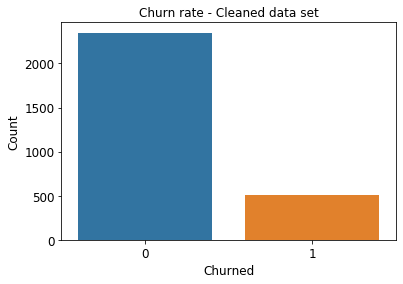

In [333]:
ax = sns.countplot(df_cleaned["Churn"])
ax = plt.axes()
ax.set_title('Churn rate - Cleaned data set')
plt.xticks(size = 12)
plt.xlabel("Churned", size=12)
plt.yticks(size=12)
plt.ylabel("Count", size=12)
plt.show()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [334]:
df_cleaned["Churn_str"] = df_cleaned["Churn"].map({0: "No", 1: "Yes"})
df_cleaned.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Device:Mobile Phone,Device:Phone,Payment:COD,Payment:Cash on Delivery,Payment:Credit Card,Payment:Debit Card,Payment:E wallet,Payment:UPI,orderCat:Laptop & Accessory,orderCat:Mobile,orderCat:Mobile Phone,Marital:Married,Marital:Single,Churn_str
0,1,4.0,3,6.0,1,3.0,3,2,1,11.0,1.0,1.0,5.0,160,1,0,0,0,0,1,0,0,1,0,0,0,1,Yes
3,1,0.0,3,15.0,0,2.0,4,5,0,23.0,0.0,1.0,3.0,134,0,1,0,0,0,1,0,0,1,0,0,0,1,Yes
11,1,11.0,1,6.0,0,3.0,4,3,1,13.0,0.0,1.0,0.0,154,1,0,0,0,0,1,0,0,0,0,0,0,1,Yes
12,1,0.0,1,11.0,0,2.0,3,3,1,13.0,2.0,2.0,2.0,134,0,1,1,0,0,0,0,0,0,1,0,0,1,Yes
13,1,0.0,1,15.0,0,3.0,4,3,1,17.0,0.0,1.0,0.0,134,0,1,0,0,0,0,0,0,0,1,0,0,0,Yes


C:\Users\ti_mo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


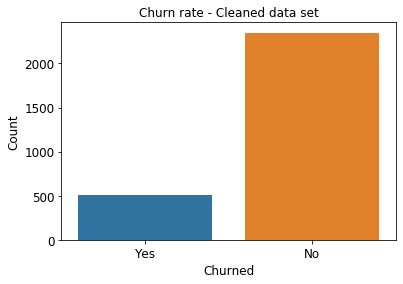

In [335]:
ax = sns.countplot(df_cleaned["Churn_str"])
ax = plt.axes()
ax.set_title('Churn rate - Cleaned data set')
plt.xticks(size = 12)
plt.xlabel("Churned", size=12)
plt.yticks(size=12)
plt.ylabel("Count", size=12)
plt.show()

In [336]:
df_cleaned["Churn_str"].value_counts()

No     2349
Yes     507
Name: Churn_str, dtype: int64

Initiate Logistic Regression

In [337]:
X = df_cleaned.drop(["Churn","Churn_str"], axis=1)
y = df_cleaned["Churn"]

In [338]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [339]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [340]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

In [341]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       699
           1       0.76      0.54      0.63       158

    accuracy                           0.88       857
   macro avg       0.83      0.75      0.78       857
weighted avg       0.88      0.88      0.88       857



In [342]:
from sklearn.metrics import confusion_matrix
cf_matrix_log = confusion_matrix(y_test, y_pred_log)
print(cf_matrix_log)

[[672  27]
 [ 72  86]]


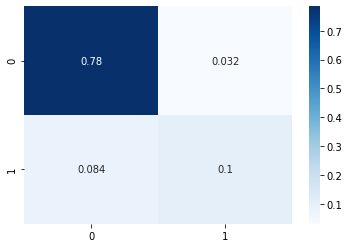

In [343]:
sns.heatmap(cf_matrix_log/np.sum(cf_matrix_log), annot=True, cmap='Blues')

C:\Users\ti_mo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


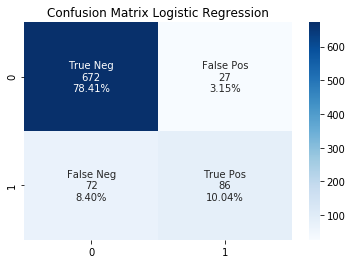

In [344]:
#Code for visualisation from here https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_log.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_log.flatten()/np.sum(cf_matrix_log)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_log, annot=labels, fmt="", cmap='Blues')
ax = plt.axes()
ax.set_title('Confusion Matrix Logistic Regression')
plt.show()

In [346]:
print(model.score(X_test, y_test))

0.8844807467911319


In [347]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
churn_tree_classifier = DecisionTreeClassifier()
churn_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [348]:
y_pred_tree = churn_tree_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_pred_tree)

0.94049008168028

In [349]:
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(cf_matrix_tree)

[[676  23]
 [ 28 130]]


C:\Users\ti_mo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


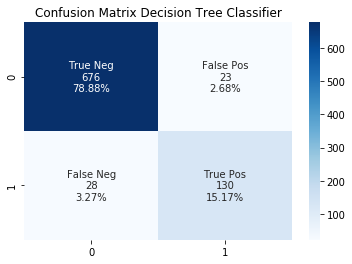

In [353]:
#Code for visualisation from here https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names_tree = ["True Neg","False Pos","False Neg","True Pos"]
group_counts_tree = ["{0:0.0f}".format(value) for value in cf_matrix_tree.flatten()]
group_percentages_tree = ["{0:.2%}".format(value) for value in cf_matrix_tree.flatten()/np.sum(cf_matrix_tree)]
labels_tree = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names_tree,group_counts_tree,group_percentages_tree)]
labels_tree = np.asarray(labels_tree).reshape(2,2)
sns.heatmap(cf_matrix_tree, annot=labels_tree, fmt="", cmap='Blues')
ax = plt.axes()
ax.set_title('Confusion Matrix Decision Tree Classifier')
plt.show()

In [372]:
#Cross val score
#Model with validation of 20 and n_neighbors = 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_cross = KNeighborsClassifier(n_neighbors=2)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=20)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.86713287 0.86713287 0.88811189 0.87412587 0.83916084 0.8951049
 0.84615385 0.88111888 0.90909091 0.88811189 0.88811189 0.86713287
 0.88111888 0.86013986 0.84615385 0.88111888 0.88028169 0.8943662
 0.88028169 0.87323944]
0.8753594996552744


In [373]:
#Model with validation of 20 and n_neighbors = 3

knn_cross = KNeighborsClassifier(n_neighbors=3)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=20)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.81118881 0.83216783 0.83916084 0.84615385 0.8041958  0.83216783
 0.7972028  0.84615385 0.86013986 0.81818182 0.81818182 0.79020979
 0.81818182 0.76223776 0.7972028  0.81118881 0.83802817 0.78873239
 0.82394366 0.79577465]
0.8165197478577759


In [374]:
#Model with validation of 20 and n_neighbors = 4

knn_cross = KNeighborsClassifier(n_neighbors=4)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=20)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.85314685 0.87412587 0.87412587 0.85314685 0.85314685 0.86713287
 0.83916084 0.84615385 0.8951049  0.86013986 0.87412587 0.83216783
 0.86013986 0.83916084 0.85314685 0.84615385 0.86619718 0.85915493
 0.85211268 0.85915493]
0.8578449719294788


In [375]:
#Model with validation of 20 and n_neighbors = 5

knn_cross = KNeighborsClassifier(n_neighbors=5)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=20)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.85314685 0.8951049  0.88111888 0.88111888 0.88811189 0.88111888
 0.84615385 0.86713287 0.93006993 0.88111888 0.87412587 0.86713287
 0.88111888 0.84615385 0.84615385 0.86013986 0.8943662  0.85211268
 0.88028169 0.88732394]
0.8746552743031616


In [376]:
#Model with validation of 20 and n_neighbors = 6

knn_cross = KNeighborsClassifier(n_neighbors=6)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=20)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.8041958  0.86713287 0.86713287 0.83916084 0.87412587 0.86013986
 0.84615385 0.83916084 0.88111888 0.86713287 0.86713287 0.86013986
 0.86713287 0.83216783 0.83216783 0.83916084 0.87323944 0.83802817
 0.88028169 0.86619718]
0.8550551561114942


In [378]:
#Model with validation of 40 and n_neighbors = 2

knn_cross = KNeighborsClassifier(n_neighbors=2)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=40)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.875      0.86111111 0.86111111 0.875      0.88888889 0.88888889
 0.86111111 0.88888889 0.80555556 0.86111111 0.875      0.90277778
 0.86111111 0.83333333 0.875      0.875      0.91549296 0.90140845
 0.87323944 0.88732394 0.88732394 0.87323944 0.88732394 0.85915493
 0.85915493 0.87323944 0.84507042 0.85915493 0.85915493 0.84507042
 0.90140845 0.85915493 0.85915493 0.91549296 0.88732394 0.91549296
 0.90140845 0.87323944 0.88732394 0.87323944]
0.8746870109546165


In [379]:
#Model with validation of 40 and n_neighbors = 3

knn_cross = KNeighborsClassifier(n_neighbors=3)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=40)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.79166667 0.81944444 0.84722222 0.79166667 0.80555556 0.875
 0.80555556 0.875      0.79166667 0.80555556 0.83333333 0.84722222
 0.83333333 0.73611111 0.86111111 0.86111111 0.85915493 0.85915493
 0.81690141 0.8028169  0.76056338 0.84507042 0.81690141 0.74647887
 0.8028169  0.8028169  0.74647887 0.76056338 0.78873239 0.81690141
 0.84507042 0.78873239 0.78873239 0.87323944 0.76056338 0.81690141
 0.84507042 0.78873239 0.8028169  0.76056338]
0.8119082550860719


In [380]:
#Model with validation of 40 and n_neighbors = 4

knn_cross = KNeighborsClassifier(n_neighbors=4)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=40)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.86111111 0.83333333 0.875      0.86111111 0.88888889 0.875
 0.84722222 0.875      0.84722222 0.86111111 0.83333333 0.90277778
 0.86111111 0.79166667 0.86111111 0.86111111 0.90140845 0.87323944
 0.87323944 0.84507042 0.84507042 0.88732394 0.84507042 0.83098592
 0.81690141 0.87323944 0.84507042 0.83098592 0.87323944 0.87323944
 0.85915493 0.84507042 0.84507042 0.88732394 0.84507042 0.88732394
 0.87323944 0.84507042 0.88732394 0.84507042]
0.8592478482003131


In [381]:
#Model with validation of 40 and n_neighbors = 5

knn_cross = KNeighborsClassifier(n_neighbors=5)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=40)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.84722222 0.86111111 0.91666667 0.86111111 0.86111111 0.90277778
 0.86111111 0.91666667 0.86111111 0.91666667 0.86111111 0.91666667
 0.875      0.81944444 0.86111111 0.90277778 0.97183099 0.90140845
 0.88732394 0.87323944 0.84507042 0.87323944 0.88732394 0.87323944
 0.84507042 0.90140845 0.87323944 0.83098592 0.87323944 0.90140845
 0.87323944 0.88732394 0.85915493 0.92957746 0.83098592 0.85915493
 0.91549296 0.85915493 0.91549296 0.87323944]
0.87956279342723


In [382]:
#Model with validation of 40 and n_neighbors = 6

knn_cross = KNeighborsClassifier(n_neighbors=6)
cross_vall_scores = cross_val_score(knn_cross, X, y, cv=40)
print(cross_vall_scores)
print(np.mean(cross_vall_scores))

[0.81944444 0.83333333 0.875      0.83333333 0.84722222 0.875
 0.81944444 0.86111111 0.875      0.88888889 0.83333333 0.90277778
 0.86111111 0.79166667 0.81944444 0.86111111 0.87323944 0.90140845
 0.87323944 0.84507042 0.84507042 0.87323944 0.90140845 0.85915493
 0.83098592 0.88732394 0.84507042 0.8028169  0.85915493 0.85915493
 0.84507042 0.85915493 0.84507042 0.87323944 0.84507042 0.84507042
 0.88732394 0.87323944 0.88732394 0.87323944]
0.8571840766823161
